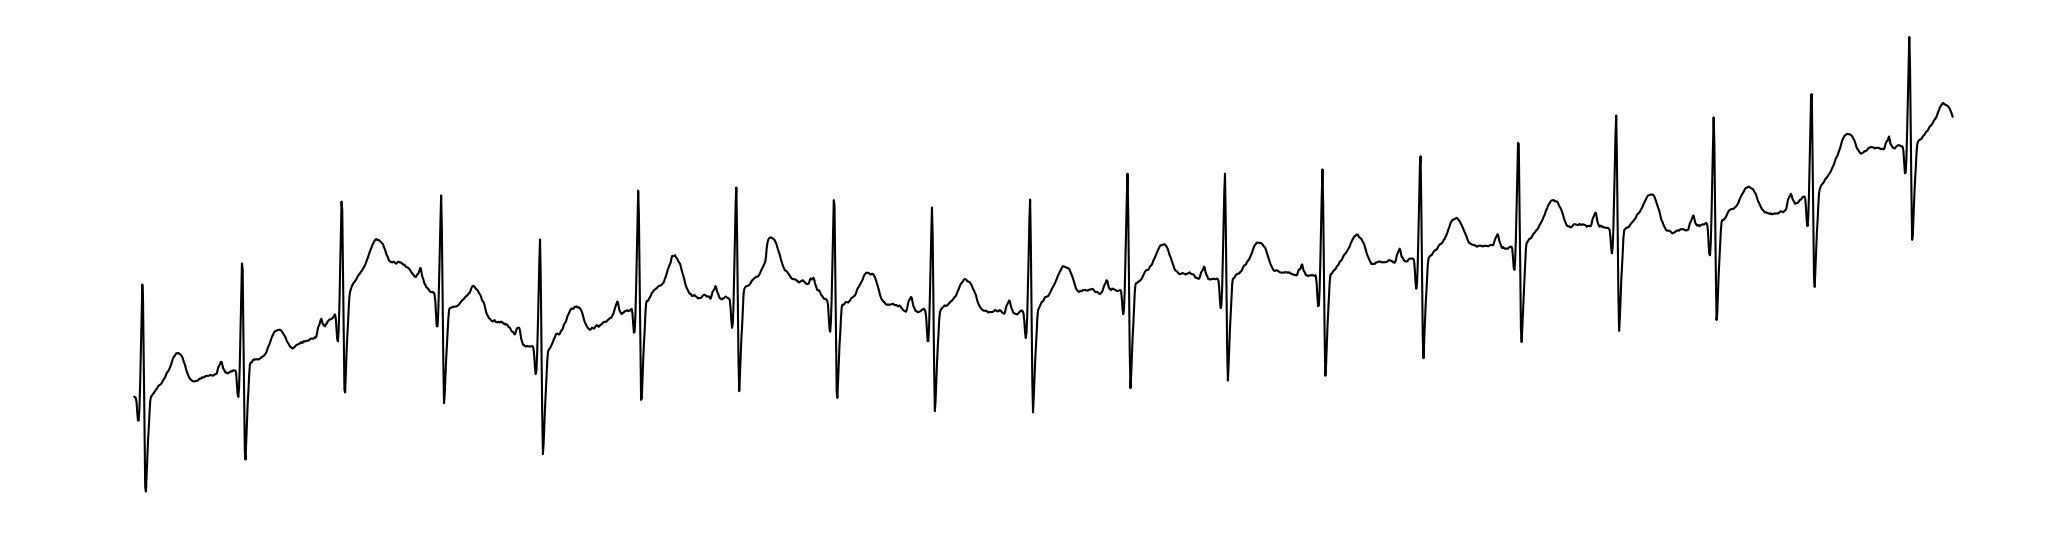

In [61]:
# Modify 'test1.jpg' and 'test2.jpg' to the images you want to predict on

from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import PIL
import PIL.Image

# dimensions of our images
img_width, img_height = 580, 180
img_path = 'test/2018-05-02T11:24:00.161Z.jpg'
PIL.Image.open(img_path)

In [62]:
# load the model we saved
model = load_model('ecg_test_model.h5')
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# predicting images
img = image.load_img(img_path, target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
y_prob = model.predict(images, batch_size=10)
print(y_prob)
y_classes = y_prob.argmax(axis=-1)
print(y_classes) #0 = abnormal, 1 = normal

[[-2.7914913  1.7727259]]
[1]


In [69]:
import os
# image folder
folder_path = 'test/'
# path to model
model_path = 'ecg_test_model.h5'
# dimensions of images
img_width, img_height = 580, 180

# load the trained model
model = load_model(model_path)
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# load all images into a list
images = []
for img in os.listdir(folder_path):
    print(img)
    img = os.path.join(folder_path, img)
    img = image.load_img(img, target_size=(img_width, img_height))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images.append(img)

# stack up images list to pass for prediction
images = np.vstack(images)
classes = model.predict(images, batch_size=10)
y_classes = classes.argmax(axis=-1)
print(y_classes) #0 = abnormal, 1 = normal

2018-05-02T11:26:41.236Z.jpg
2018-05-02T11:23:29.996Z.jpg
2018-05-02T11:24:10.249Z.jpg
2018-05-02T11:24:30.382Z.jpg
2018-05-02T11:23:40.034Z.jpg
2018-05-02T11:24:00.161Z.jpg
2018-05-02T11:24:50.528Z.jpg
2018-05-02T11:23:50.120Z.jpg
2018-05-02T11:25:10.656Z.jpg
2018-05-02T11:26:21.100Z.jpg
2018-05-02T11:26:11.013Z.jpg
2018-05-02T11:26:31.146Z.jpg
2018-05-02T11:24:40.435Z.jpg
2018-05-02T11:26:00.960Z.jpg
2018-05-02T11:25:50.917Z.jpg
2018-05-02T11:24:20.291Z.jpg
2018-05-02T11:25:00.569Z.jpg
2018-05-02T11:25:30.784Z.jpg
2018-05-02T11:25:40.833Z.jpg
2018-05-02T11:25:20.694Z.jpg
[1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0]


In [80]:
import time
for img in os.listdir(folder_path):
    start_time = time.time()
    img = os.path.join(folder_path, img)
    print(img)
    img = image.load_img(img, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    y_prob = model.predict(images, batch_size=10)
    print(y_prob)
    y_classes = y_prob.argmax(axis=-1)
    print(y_classes) #0 = abnormal, 1 = normal
    inference_time = (time.time() - start_time)*1000
    print("Inference time: %s milliseconds" % inference_time)
    time.sleep(1)

test/2018-05-02T11:26:41.236Z.jpg
[[-4.214976  4.303743]]
[1]
Inference time: 63.54260444641113 milliseconds
test/2018-05-02T11:23:29.996Z.jpg
[[-5.430913    0.88589084]]
[1]
Inference time: 58.68172645568848 milliseconds
test/2018-05-02T11:24:10.249Z.jpg
[[-3.2148764  2.6102588]]
[1]
Inference time: 58.417320251464844 milliseconds
test/2018-05-02T11:24:30.382Z.jpg
[[11.4237795 -6.034181 ]]
[0]
Inference time: 65.14573097229004 milliseconds
test/2018-05-02T11:23:40.034Z.jpg
[[-2.9256368  2.9967034]]
[1]
Inference time: 66.75171852111816 milliseconds
test/2018-05-02T11:24:00.161Z.jpg
[[-2.7914913  1.7727259]]
[1]
Inference time: 60.15610694885254 milliseconds
test/2018-05-02T11:24:50.528Z.jpg
[[ 1.9684604  -0.51154053]]
[0]
Inference time: 61.2943172454834 milliseconds
test/2018-05-02T11:23:50.120Z.jpg
[[ 3.262391  -0.3371157]]
[0]
Inference time: 59.8146915435791 milliseconds
test/2018-05-02T11:25:10.656Z.jpg
[[ 1.4857728 -0.428788 ]]
[0]
Inference time: 61.32817268371582 milliseconds
